# Support Vector Machines - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('cement_slump.csv')


In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


## Exploratory Data Analysis and Visualization

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


<AxesSubplot:>

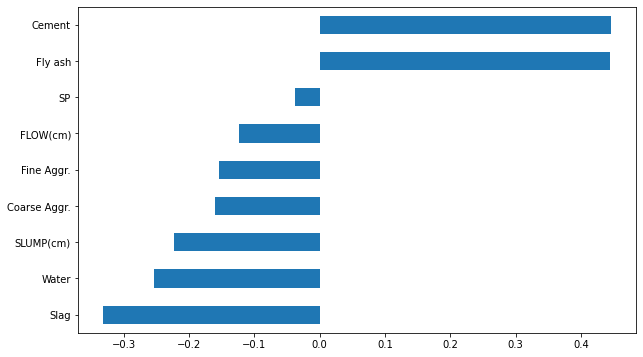

In [5]:
df.corr()['Compressive Strength (28-day)(Mpa)'].drop('Compressive Strength (28-day)(Mpa)').sort_values().plot.barh()

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

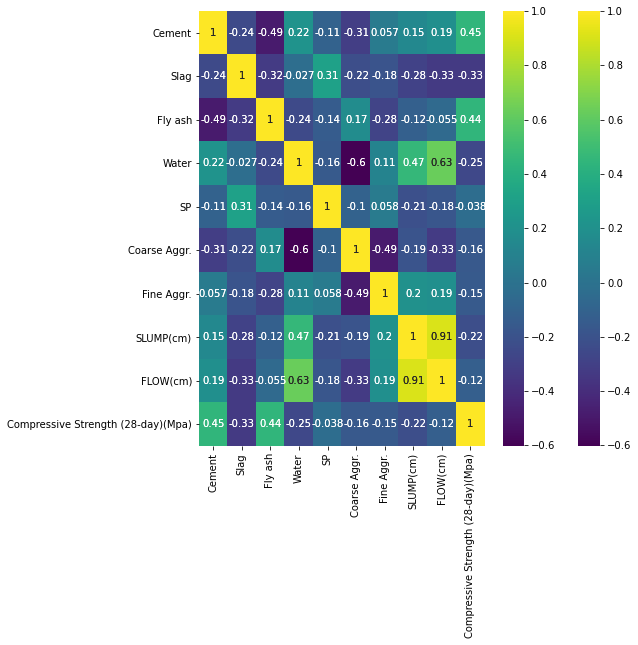

In [6]:
plt.figure(figsize=(8,8))
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, cmap='viridis')
sns.heatmap(df.corr(),annot=True, cmap="viridis")

## Train | Test Split and Scaling

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler  = StandardScaler()
acaler  = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [15]:
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

### With Default Parameters

In [16]:
svr_model = SVR()
svr_model = SVR()

In [16]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [18]:
svr_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled,y_train)

SVR()

In [17]:
y_pred = svr_model.predict(X_test_scaled)

In [18]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [19]:
eval_metric(y_test, y_pred)

r2_score: 0.34523422389221803 
mae: 5.236902091259178 
mse: 44.83527552212948 
rmse: 6.695914838327133


### Cross Validate

In [20]:
from sklearn.model_selection import cross_validate

In [21]:
model = SVR()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2',
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_r2                              0.221
test_neg_mean_absolute_error        -4.667
test_neg_mean_squared_error        -37.826
test_neg_root_mean_squared_error    -5.784
dtype: float64

### With Best Parameters (GridsearchCV)

In [22]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
model = SVR()
svr_grid_model = GridSearchCV(model, param_grid=param_grid)

In [25]:
svr_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
svr_grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [27]:
y_pred_grid = svr_grid_model.predict(X_test_scaled)

In [28]:
eval_metric(y_test, y_pred_grid)

r2_score: 0.8524866277808405 
mae: 2.5128012210762365 
mse: 10.10102074357006 
rmse: 3.178210305119858


In [29]:
eval_metric(y_test, y_pred)

r2_score: 0.34523422389221803 
mae: 5.236902091259178 
mse: 44.83527552212948 
rmse: 6.695914838327133
